# Classification Comparison Project

This project aims to juxtapose the intuition and implementation of various supervised classification ML models and find the most accurate one in relation to the goal of classifying labeled data.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

## Data Selection

The data that will be used in this project is the "Mushroom Classification" dataset by UCI Machine Learning. It was downloaded from Kaggle [here](https://www.kaggle.com/datasets/uciml/mushroom-classification), and can be found in this project's repository as "mushrooms.csv".  
It contains information about mushrooms as well as labels for each record indicating if the mushroom is edible or poisonous.

Attribute Information:
- (TARGET) classes: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
# Storing the dataset in a DataFrame

rawData = pd.read_csv('mushrooms.csv')

## Initial Data Exploration

In [3]:
# Viewing the head of the DataFrame to get a general idea of how it looks

rawData.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Dataset Shape

rawData.shape

# 8124 Observations (rows), 23 Features (columns)

(8124, 23)

In [13]:
# Column Names

rawData.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [14]:
# Column Datatypes

rawData.dtypes

# All feature data types seem to be in line with what we expect based on the Attribute Information above.

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [18]:
# Descriptive Statistics

# Since all of our features are categorical and non-numeric, it is not appropriate to view descriptive statistics
# right now.

# rawData.describe()

In [21]:
# Identifying Missing data

rawData.isnull().sum().sort_values()

# It looks like none of our features contain missing data.

class                       0
spore-print-color           0
ring-type                   0
ring-number                 0
veil-color                  0
veil-type                   0
stalk-color-below-ring      0
stalk-color-above-ring      0
stalk-surface-below-ring    0
stalk-surface-above-ring    0
population                  0
stalk-root                  0
gill-color                  0
gill-size                   0
gill-spacing                0
gill-attachment             0
odor                        0
bruises                     0
cap-color                   0
cap-surface                 0
cap-shape                   0
stalk-shape                 0
habitat                     0
dtype: int64

In [23]:
# Identifying Duplicate Records

rawData.duplicated().sum()

# It appears that we do not have any duplicate records in this dataset either.

0

In [8]:
# A method call that displays column names, indirect null counts, and feature data types

rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Data Cleaning

In [29]:
# We saw above that our dataset has...
    # No missing values
    # No duplicate records
    # Appropriate feature datatypes

# The last consideration we need to make is whether any features contain typos (multiple strings being used to refer to the
# same category). We will check each feature for this now.

In [39]:
print("Feature\t| Unique Values\n")
for column in rawData.columns:
    print(f"{column}\t{sorted(rawData[column].unique())}")
    
# There does not appear to be any typos when comparing this list of values with the Attribute Information of the source.

Feature	| Unique Values

class	['e', 'p']
cap-shape	['b', 'c', 'f', 'k', 's', 'x']
cap-surface	['f', 'g', 's', 'y']
cap-color	['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']
bruises	['f', 't']
odor	['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']
gill-attachment	['a', 'f']
gill-spacing	['c', 'w']
gill-size	['b', 'n']
gill-color	['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']
stalk-shape	['e', 't']
stalk-root	['?', 'b', 'c', 'e', 'r']
stalk-surface-above-ring	['f', 'k', 's', 'y']
stalk-surface-below-ring	['f', 'k', 's', 'y']
stalk-color-above-ring	['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
stalk-color-below-ring	['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
veil-type	['p']
veil-color	['n', 'o', 'w', 'y']
ring-number	['n', 'o', 't']
ring-type	['e', 'f', 'l', 'n', 'p']
spore-print-color	['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y']
population	['a', 'c', 'n', 's', 'v', 'y']
habitat	['d', 'g', 'l', 'm', 'p', 'u', 'w']


## Exploratory Data Analysis

As this data is completely categorical and non-numeric, in our EDA process we are going to visualize the distribution of each class within our dataset as a whole and in relation to our target feature ('class'). The goal here is to try to understand if our dataset is balanced relative to each other and if we can see any visual indication of relation between each category and the target feature.

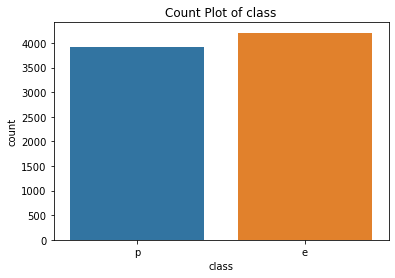

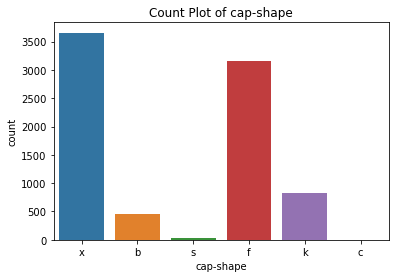

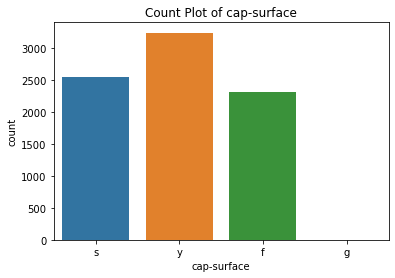

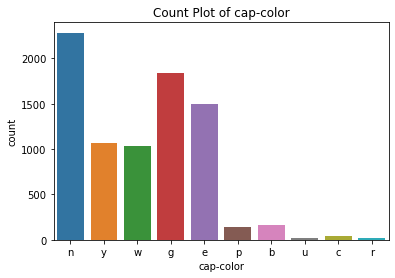

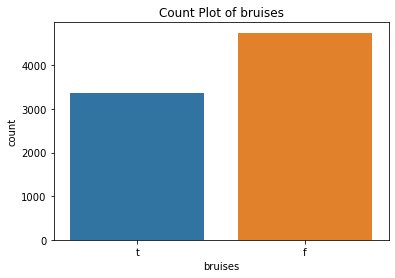

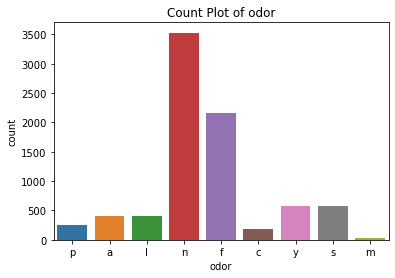

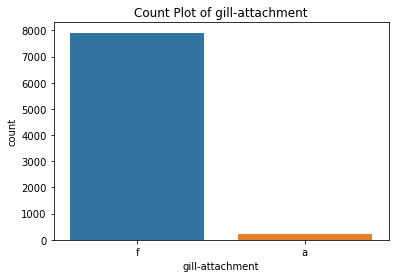

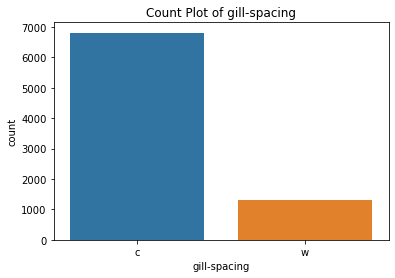

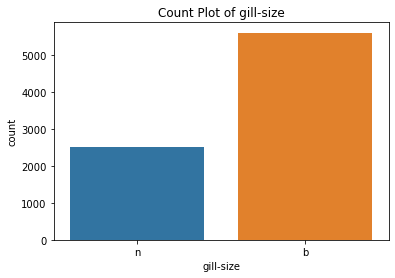

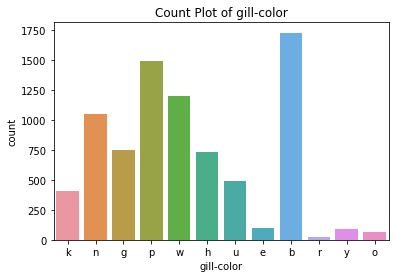

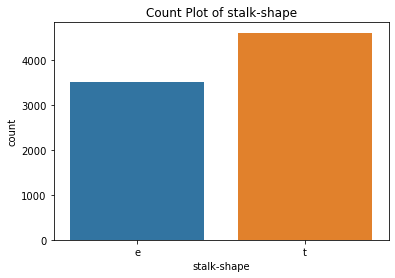

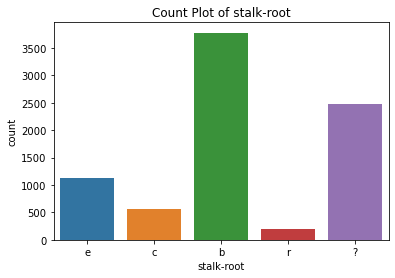

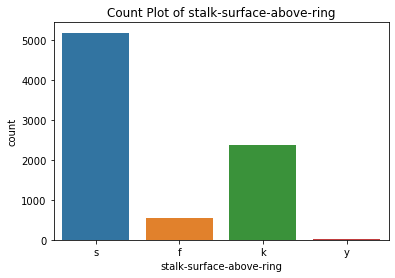

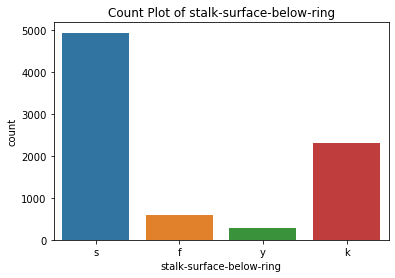

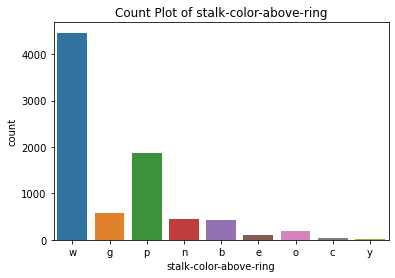

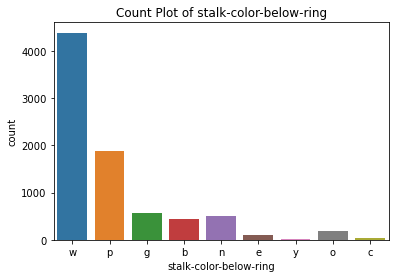

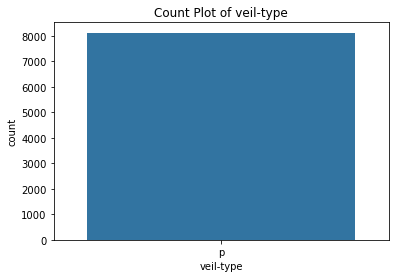

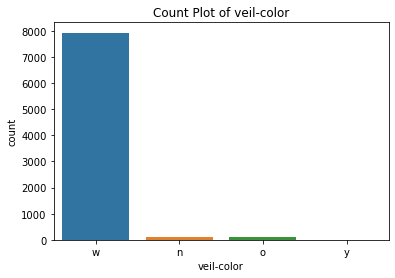

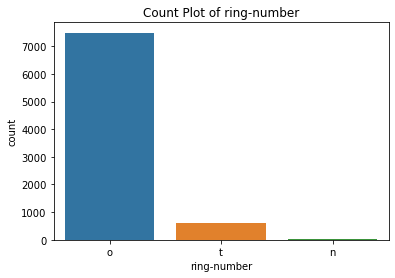

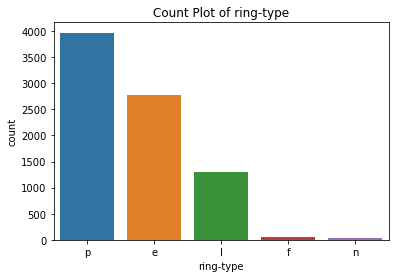

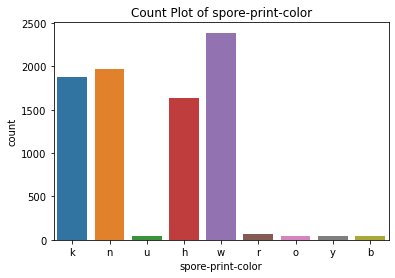

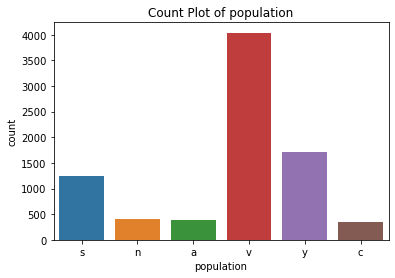

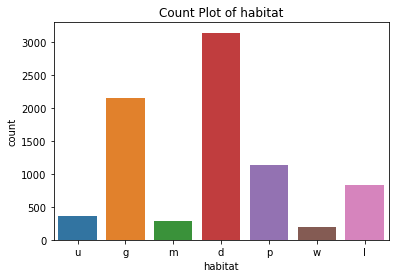

In [43]:
for column in rawData.columns:
    sns.countplot(x=rawData[column])
    plt.title(f"Count Plot of {column}")
    plt.show()

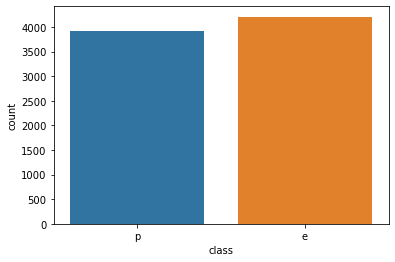

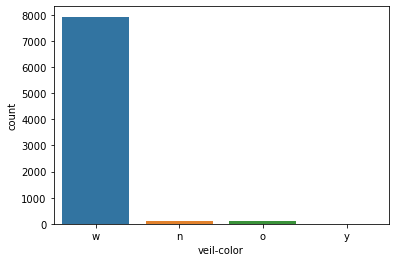

In [42]:
# Class (our Target Feature)

sns.countplot(x=rawData['class'])
plt.show()
sns.countplot(x=rawData['veil-color'])
plt.show()

# Relatively uniform distribution

## Machine Learning Intuition

## Preprocessing

## Model Creation and Training

## Model Evaluation

## Best Model Selection and Generalization

## Model Productionization

## Next Steps